# A Machine Learning Model for Housing Price Prediction

<br>Author: Christopher Decker
<br>WGU ID: 001485578

## Window Configurations

This code block just makes it so larger cells of output don't have scrollbars inside.  I prefer this for graphs.

## Import Packages and Package Configuration

### Import Pandas

In [8]:
#Import Pandas
import pandas as pd
#Display default float precision inside of cells.
pd.set_option('display.float_format', lambda x: '%.2f' % x)
#Print version for verification of load.
print("Pandas version: {}".format(pd.__version__))

Pandas version: 2.1.4


### Import NumPy

In [10]:
#Import NumPy
import numpy as np
#Print version for verification of load.
print("Numpy version: {}".format(np.__version__))

Numpy version: 1.26.4


### Import MatPlotLib and PyPlot

In [12]:
#Import MatPlotLib
import matplotlib
import matplotlib.pyplot as plt
#Print version for verification of load.
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.8.0


### Import Seaborn

In [14]:
#Import Seaborn
import seaborn as sns
#Set default graph theme.
sns.set_theme()
sns.set_style("darkgrid")
#Print version for verification of load.
print("Seaborn version: {}".format(sns.__version__))

Seaborn version: 0.13.2


### Import SciKit

In [16]:
#Import SciKit
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
#Print version for verification of load.
print('sklearn: {}'.format(sklearn.__version__))

sklearn: 1.2.2


## Data Read and Formatting

### Read Data

This is done through a hosted CSV for the purpose of this exercise.  This system could be adapted to pull data from a number of sources.

In [19]:
df = pd.read_csv('https://github.com/ChrisDecker06/C964-capstone/blob/main/Housing.csv?raw=true')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300,2,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.00,0,0,...,8,1530,0,2009,0,98103,47.70,-122.35,1530,1509
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.00,0,0,...,8,2310,0,2014,0,98146,47.51,-122.36,1830,7200
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.00,0,0,...,7,1020,0,2009,0,98144,47.59,-122.30,1020,2007
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.00,0,0,...,8,1600,0,2004,0,98027,47.53,-122.07,1410,1287


### Re-Type the Data

In this code block we drop unnecessary columns and re-type the remaining to numerics.

In [21]:
df["id"] = pd.to_numeric(df["id"])
df["price"] = pd.to_numeric(df["price"])
df["bedrooms"] = pd.to_numeric(df["bedrooms"])
df["bathrooms"] = pd.to_numeric(df["bathrooms"])
df["sqft_living"] = pd.to_numeric(df["sqft_living"])
df["sqft_lot"] = pd.to_numeric(df["sqft_lot"])
df["floors"] = pd.to_numeric(df["floors"])
df["waterfront"] = pd.to_numeric(df["waterfront"])
df["view"] = pd.to_numeric(df["view"])
df["condition"] = pd.to_numeric(df["condition"])
df["grade"] = pd.to_numeric(df["grade"])
df["sqft_above"] = pd.to_numeric(df["sqft_above"])
df["sqft_basement"] = pd.to_numeric(df["sqft_basement"])
df["yr_built"] = pd.to_numeric(df["yr_built"])
df["yr_renovated"] = pd.to_numeric(df["yr_renovated"])
df["sqft_living15"] = pd.to_numeric(df["sqft_living15"])
df["sqft_lot15"] = pd.to_numeric(df["sqft_lot15"])

df.drop(columns="id", inplace=True)
df.drop(columns="date", inplace=True)
df.drop(columns="zipcode", inplace=True)
df.drop(columns="lat", inplace=True)
df.drop(columns="long", inplace=True)

df.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,231300,2,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,1340,5650
1,538000,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,2720,8062


## Data Cleansing

### Data Info

Let's look at some basic information about the data.  We are mostly looking to make sure all columns are present, typed as numeric, non-null, and all have the same amount of values.

In [25]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  int64  
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  sqft_living15  21613 non-null  int64  
 15  sqft_lot15     21613 non-null  int64  
dtypes: float64(2), int64(14)
memory usage: 2.6 MB


Let's look at a histogram for each column.  This will show us general distribution of our data points.

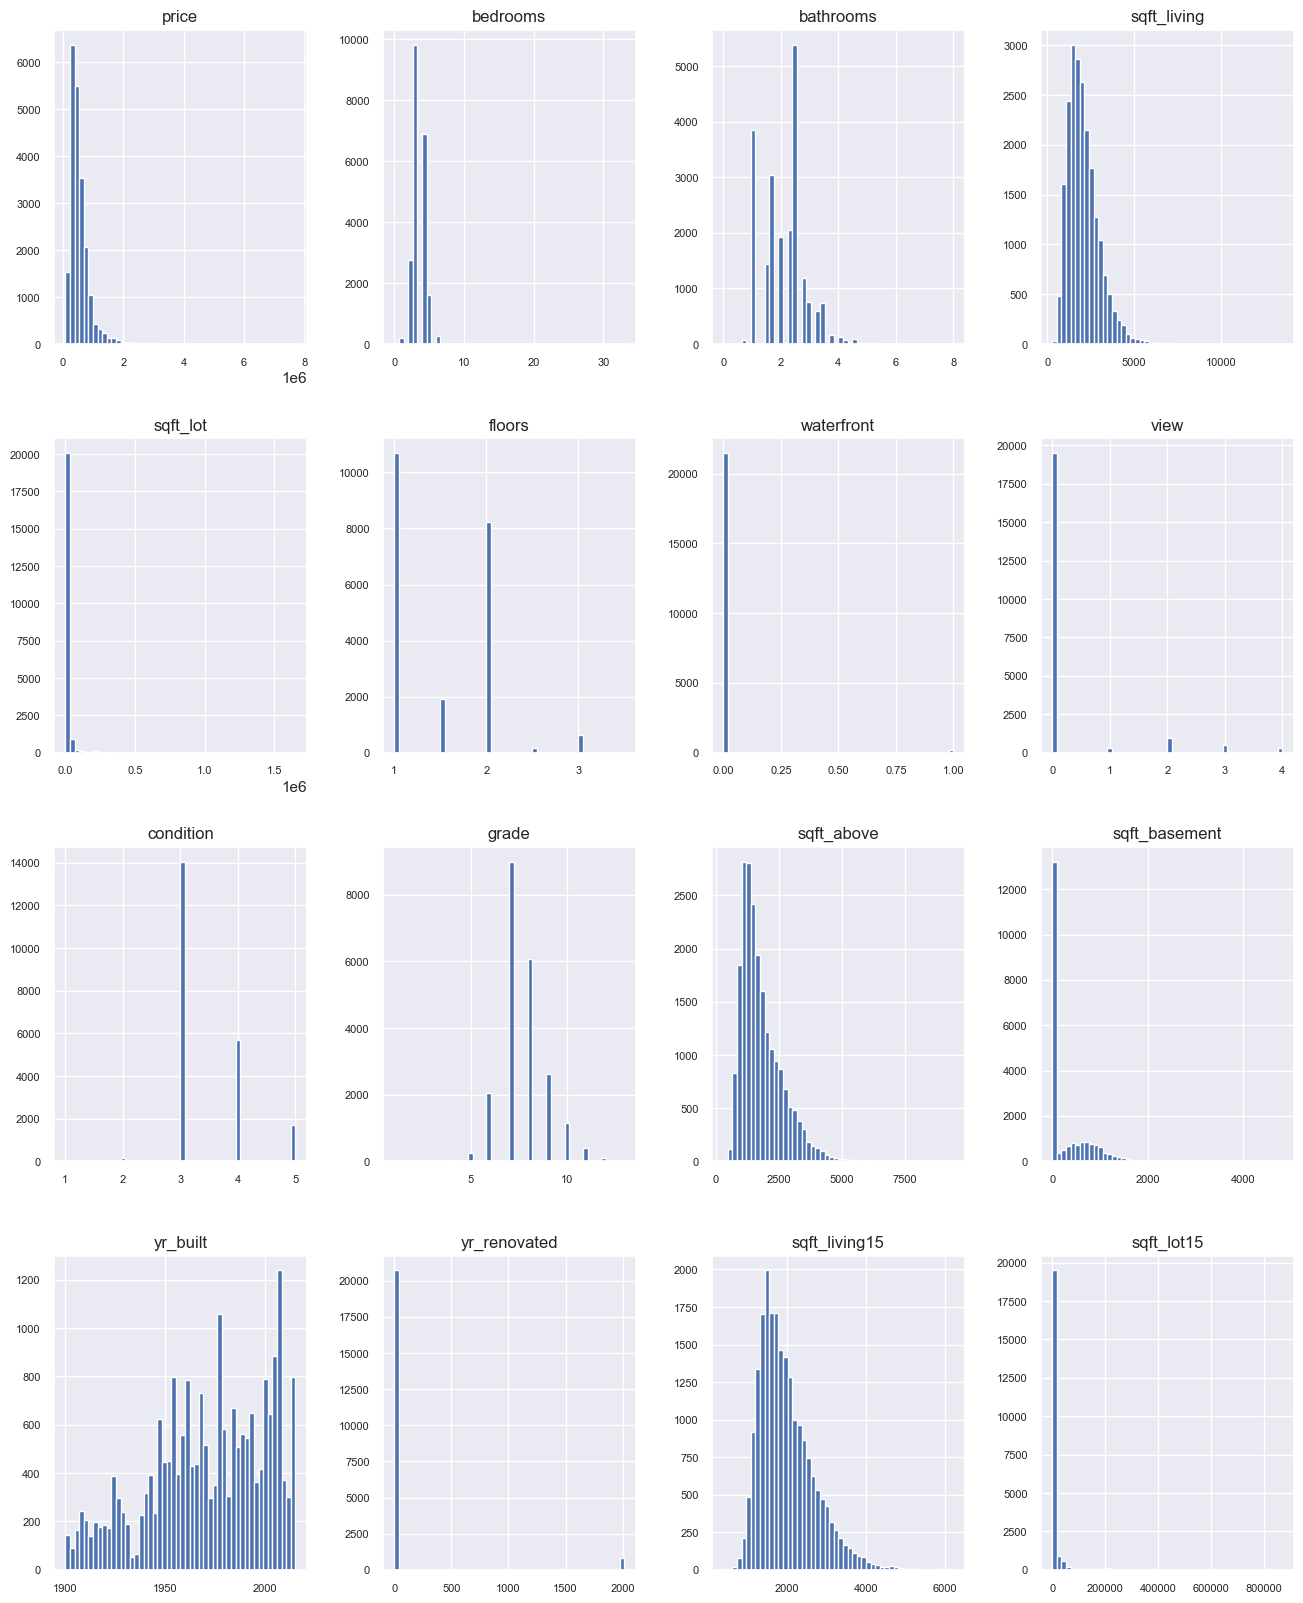

In [27]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

We'll definitely need to clean up this data.

### Cleansing Function Definition

I'm writing the algorithm to clean up the data inside of a function.  In this iteration, we are only ever pulling data in once, but I'd like the ability to pull data from multiple sources, so the ability to call this multiple times easily.

In [31]:
#Funciton definition for the data_cleanse function.
def data_cleanse(df):
  #Iterate through each column.
  for column in df:

    #Print a header for this block.
    print()
    print("Cleansing", df[column].name)
    print()

    #Text header to clarify what we're doing.
    print("Removing Outliers")
    print()

    #Box plot of data distribution
    fig, ax = plt.subplots()
    ax.ticklabel_format(axis="both", style="plain")
    sns.boxplot(df[column])
    name = "Box Plot of " + df[column].name
    plt.title(name)
    plt.show()
    print()

    #Calculate upper and lower limits.
    upper_limit = df[column].quantile(.999)
    lower_limit = df[column].quantile(.001)
    upper_limit = upper_limit*1.5
    lower_limit = lower_limit/1.5
    print("Upper Limit: ", upper_limit)
    print("Lower Limit: ", lower_limit)
    print()

    #Find indexes for outliers.
    beyond_upper = np.where(df[column] > upper_limit)[0]
    beyond_lower = np.where(df[column] < lower_limit)[0]
    #Consolidate all indices to be dropped into a single list
    drops = np.union1d(beyond_upper, beyond_lower)
    #Reverse the order of the list, so after the first in the list is dropped, it doesn't affect the indices of the rest of the list.
    drops = drops[::-1]
    #Print the list.
    print(drops)
    print()

    #Print the count of rows in the data set
    print("Shape pre-drops", df.shape)
    print()

    #Drop the rows.
    for i in drops:
      print("Dropping index:", i, "with value", df[column][i], "in column", column)
      df.drop(i, inplace=True)

    #Print the count of rows in the data set after the drops
    print()
    print("Shape post-drops", df.shape)

    #Box plot of data distribution after the drops.
    print()
    print("New Box Plot")
    print()
    fig, ax = plt.subplots()
    ax.ticklabel_format(axis="both", style="plain")
    sns.boxplot(df[column])
    name = "Updated Box Plot of " + df[column].name
    plt.title(name)
    plt.show()

    print()
    print("------------------------------------------------------------------------")

    #Reset the indexes so subsequent passes aren't affected.  (This took me like an hour to figure out why the data wasn't matching up on the second+ pass.)
    df.reset_index(drop=True, inplace=True)

  return

### Cleanse the Data

Here we actually call the function to clean up the data.


Cleansing price

Removing Outliers



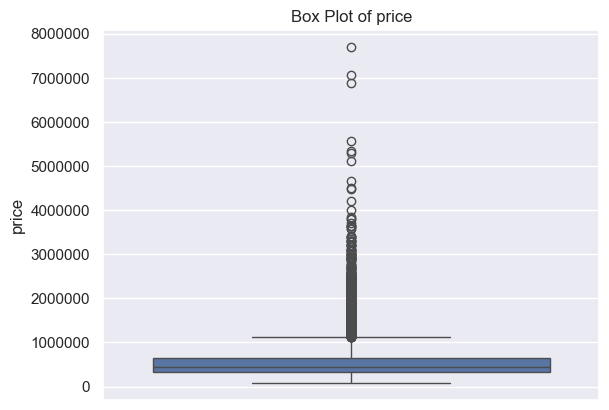


Upper Limit:  5214452.400000589
Lower Limit:  63333.333333333336

[9254 7252 4411 3914 1448 1315]

Shape pre-drops (21613, 16)

Dropping index: 9254 with value 6885000 in column price
Dropping index: 7252 with value 7700000 in column price
Dropping index: 4411 with value 5570000 in column price
Dropping index: 3914 with value 7062500 in column price
Dropping index: 1448 with value 5350000 in column price
Dropping index: 1315 with value 5300000 in column price

Shape post-drops (21607, 16)

New Box Plot



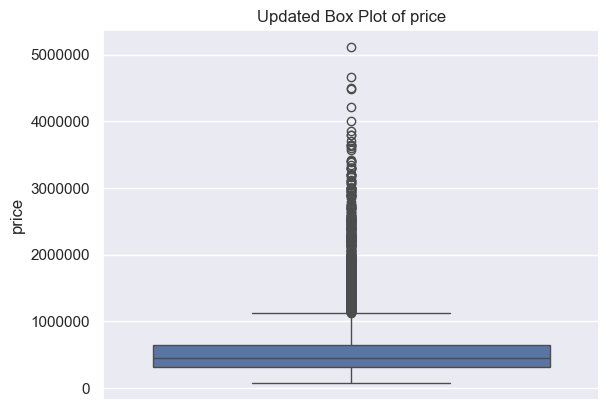


------------------------------------------------------------------------

Cleansing bedrooms

Removing Outliers



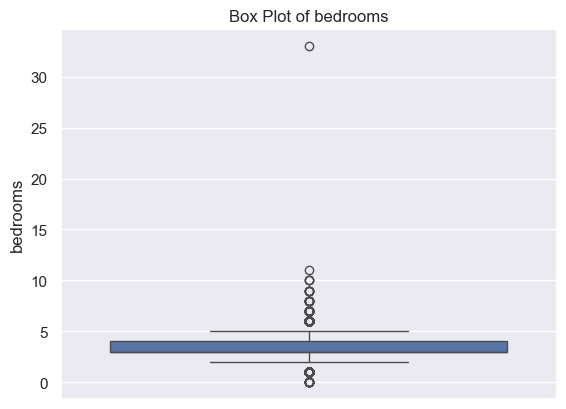


Upper Limit:  12.0
Lower Limit:  0.6666666666666666

[19446 18373 15864 14417 12647  9848  9767  8479  8472  6990  4864  3465
  3117   875]

Shape pre-drops (21607, 16)

Dropping index: 19446 with value 0 in column bedrooms
Dropping index: 18373 with value 0 in column bedrooms
Dropping index: 15864 with value 33 in column bedrooms
Dropping index: 14417 with value 0 in column bedrooms
Dropping index: 12647 with value 0 in column bedrooms
Dropping index: 9848 with value 0 in column bedrooms
Dropping index: 9767 with value 0 in column bedrooms
Dropping index: 8479 with value 0 in column bedrooms
Dropping index: 8472 with value 0 in column bedrooms
Dropping index: 6990 with value 0 in column bedrooms
Dropping index: 4864 with value 0 in column bedrooms
Dropping index: 3465 with value 0 in column bedrooms
Dropping index: 3117 with value 0 in column bedrooms
Dropping index: 875 with value 0 in column bedrooms

Shape post-drops (21593, 16)

New Box Plot



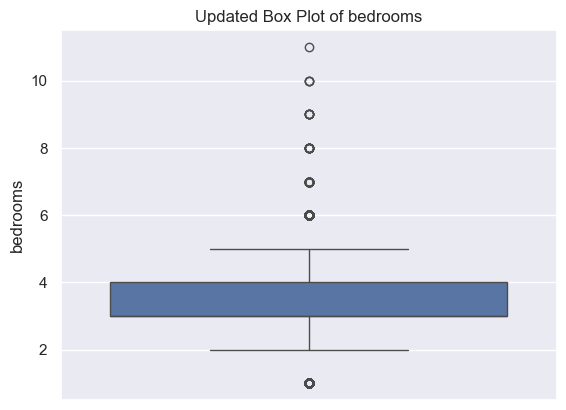


------------------------------------------------------------------------

Cleansing bathrooms

Removing Outliers



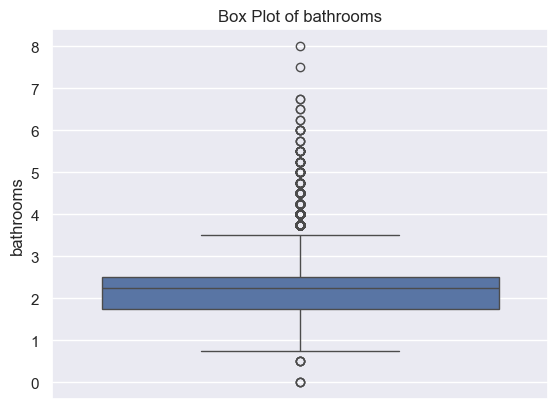


Upper Limit:  8.25
Lower Limit:  0.5

[10466  5824  1148]

Shape pre-drops (21593, 16)

Dropping index: 10466 with value 0.0 in column bathrooms
Dropping index: 5824 with value 0.0 in column bathrooms
Dropping index: 1148 with value 0.0 in column bathrooms

Shape post-drops (21590, 16)

New Box Plot



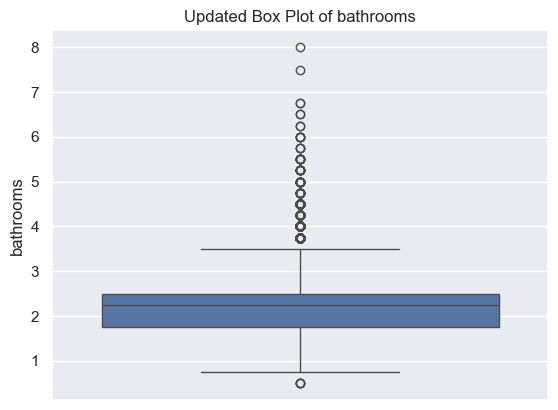


------------------------------------------------------------------------

Cleansing sqft_living

Removing Outliers



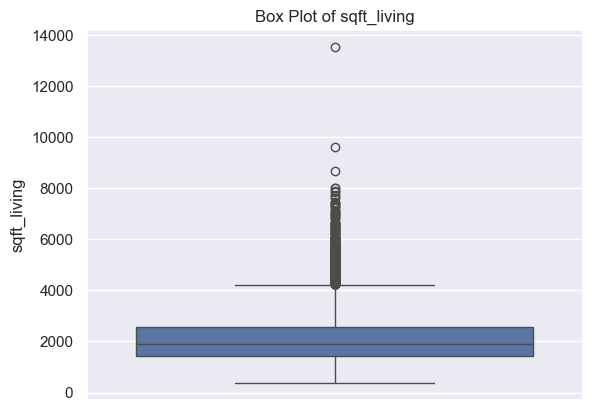


Upper Limit:  10530.825000000277
Lower Limit:  353.3333333333333

[12758]

Shape pre-drops (21590, 16)

Dropping index: 12758 with value 13540 in column sqft_living

Shape post-drops (21589, 16)

New Box Plot



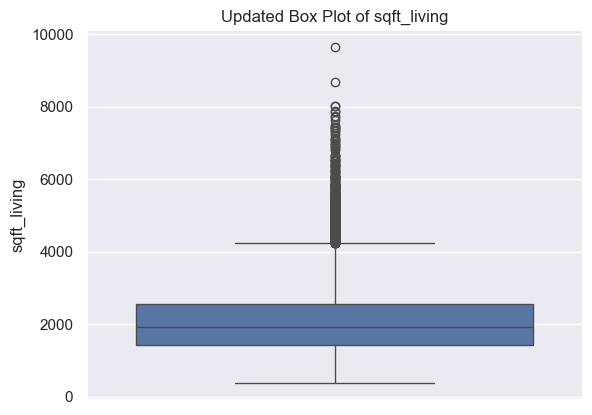


------------------------------------------------------------------------

Cleansing sqft_lot

Removing Outliers



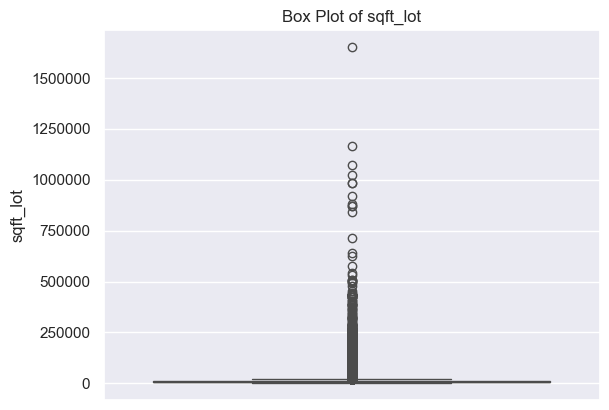


Upper Limit:  744031.8660000353
Lower Limit:  474.0

[20428 17297  9699  7757  7635  7066  6681  4532  4433  3942  1715]

Shape pre-drops (21589, 16)

Dropping index: 20428 with value 871200 in column sqft_lot
Dropping index: 17297 with value 1164794 in column sqft_lot
Dropping index: 9699 with value 871200 in column sqft_lot
Dropping index: 7757 with value 1024068 in column sqft_lot
Dropping index: 7635 with value 1074218 in column sqft_lot
Dropping index: 7066 with value 881654 in column sqft_lot
Dropping index: 6681 with value 920423 in column sqft_lot
Dropping index: 4532 with value 843309 in column sqft_lot
Dropping index: 4433 with value 982278 in column sqft_lot
Dropping index: 3942 with value 982998 in column sqft_lot
Dropping index: 1715 with value 1651359 in column sqft_lot

Shape post-drops (21578, 16)

New Box Plot



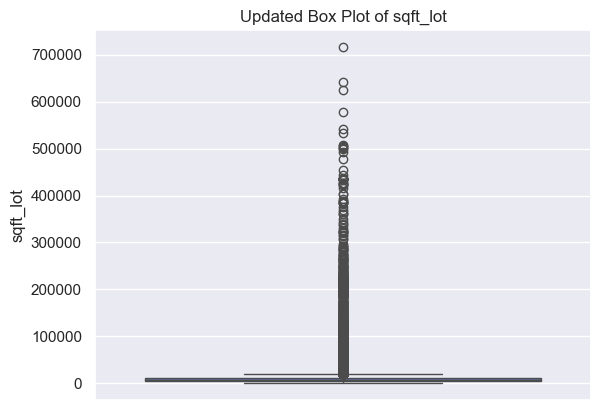


------------------------------------------------------------------------

Cleansing floors

Removing Outliers



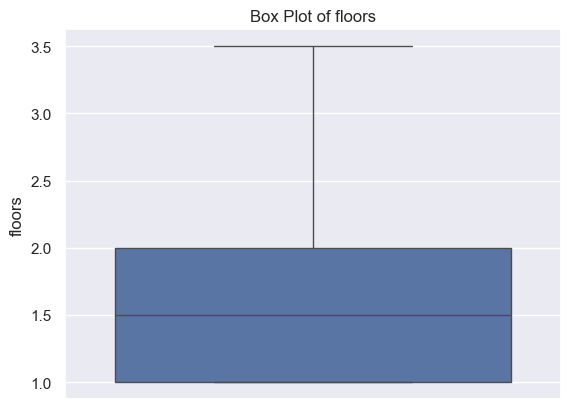


Upper Limit:  4.5
Lower Limit:  0.6666666666666666

[]

Shape pre-drops (21578, 16)


Shape post-drops (21578, 16)

New Box Plot



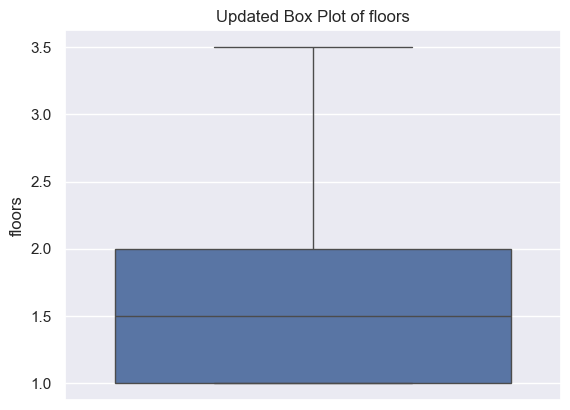


------------------------------------------------------------------------

Cleansing waterfront

Removing Outliers



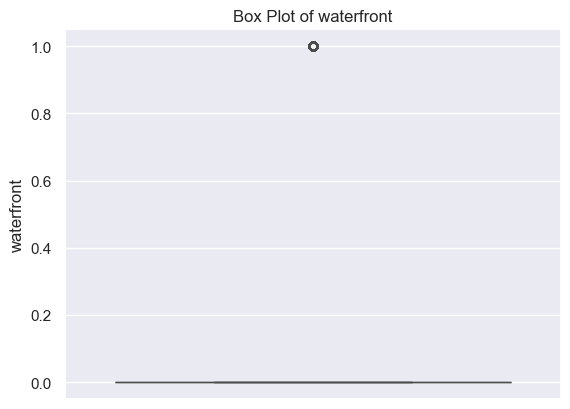


Upper Limit:  1.5
Lower Limit:  0.0

[]

Shape pre-drops (21578, 16)


Shape post-drops (21578, 16)

New Box Plot



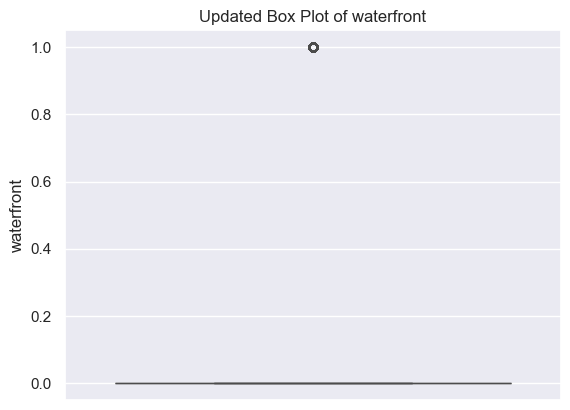


------------------------------------------------------------------------

Cleansing view

Removing Outliers



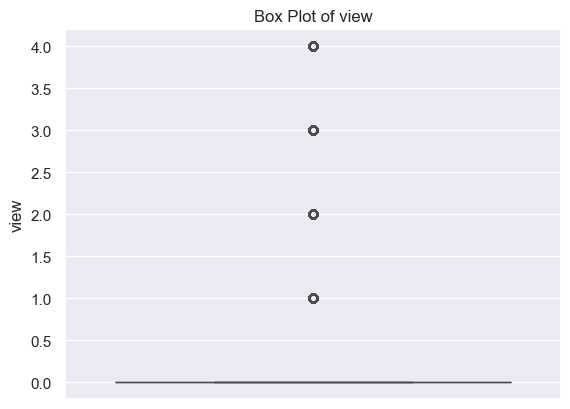


Upper Limit:  6.0
Lower Limit:  0.0

[]

Shape pre-drops (21578, 16)


Shape post-drops (21578, 16)

New Box Plot



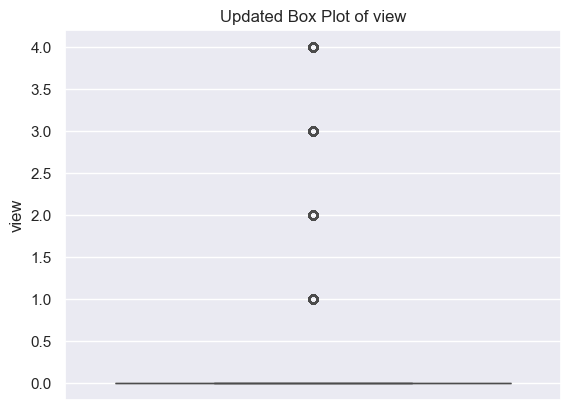


------------------------------------------------------------------------

Cleansing condition

Removing Outliers



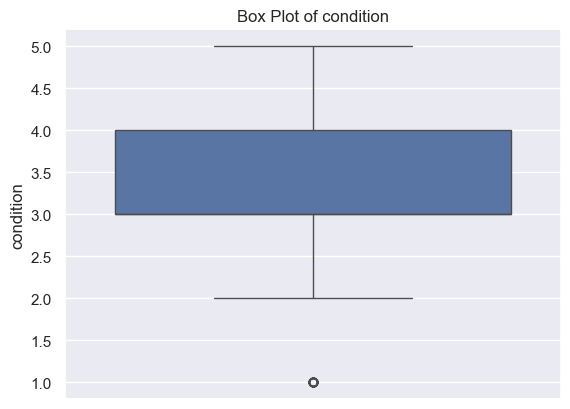


Upper Limit:  7.5
Lower Limit:  0.6666666666666666

[]

Shape pre-drops (21578, 16)


Shape post-drops (21578, 16)

New Box Plot



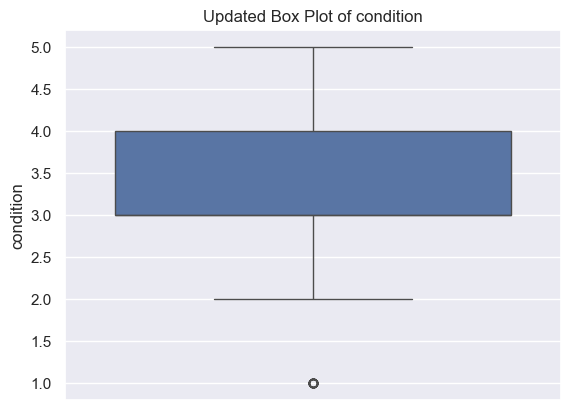


------------------------------------------------------------------------

Cleansing grade

Removing Outliers



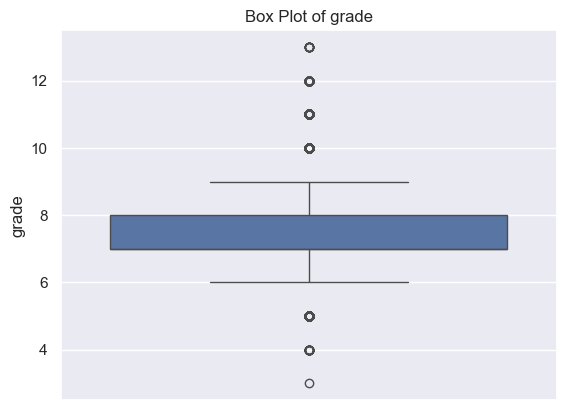


Upper Limit:  18.0
Lower Limit:  2.6666666666666665

[]

Shape pre-drops (21578, 16)


Shape post-drops (21578, 16)

New Box Plot



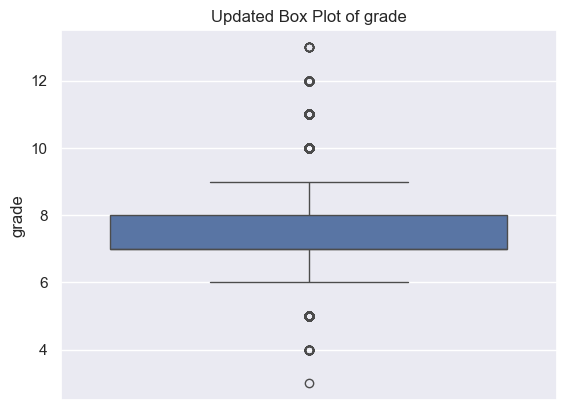


------------------------------------------------------------------------

Cleansing sqft_above

Removing Outliers



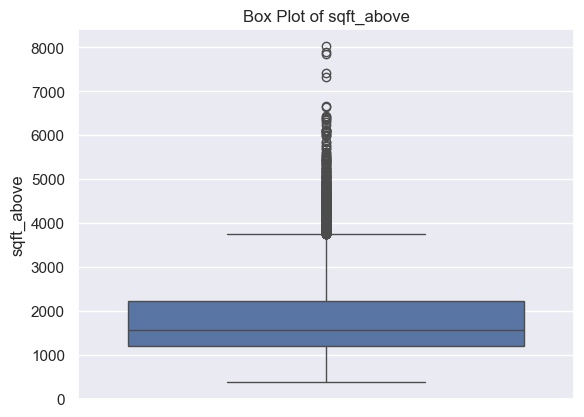


Upper Limit:  9023.070000000225
Lower Limit:  346.6666666666667

[]

Shape pre-drops (21578, 16)


Shape post-drops (21578, 16)

New Box Plot



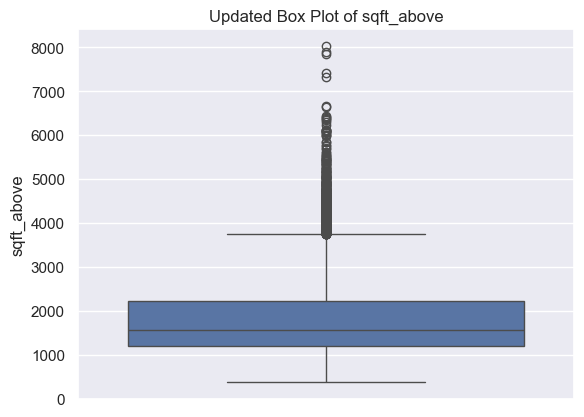


------------------------------------------------------------------------

Cleansing sqft_basement

Removing Outliers



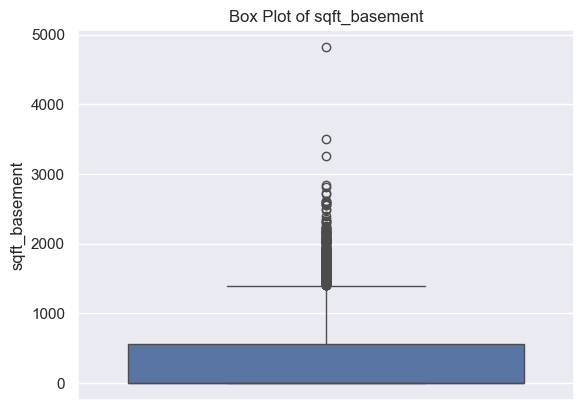


Upper Limit:  3456.3450000000375
Lower Limit:  0.0

[15452  8072]

Shape pre-drops (21578, 16)

Dropping index: 15452 with value 3500 in column sqft_basement
Dropping index: 8072 with value 4820 in column sqft_basement

Shape post-drops (21576, 16)

New Box Plot



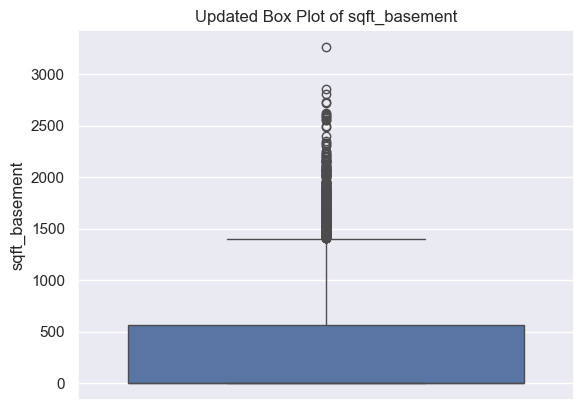


------------------------------------------------------------------------

Cleansing yr_built

Removing Outliers



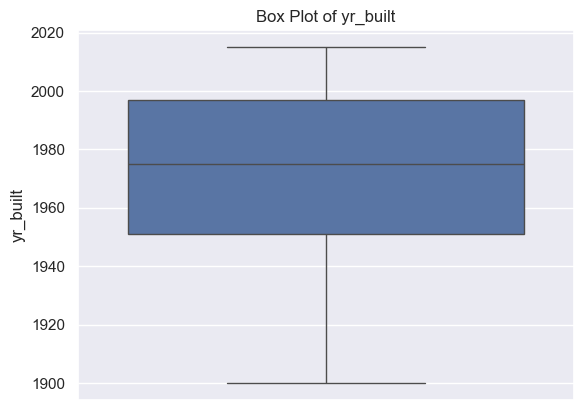


Upper Limit:  3022.5
Lower Limit:  1266.6666666666667

[]

Shape pre-drops (21576, 16)


Shape post-drops (21576, 16)

New Box Plot



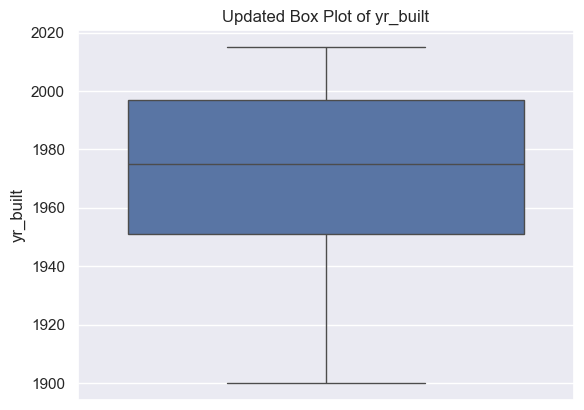


------------------------------------------------------------------------

Cleansing yr_renovated

Removing Outliers



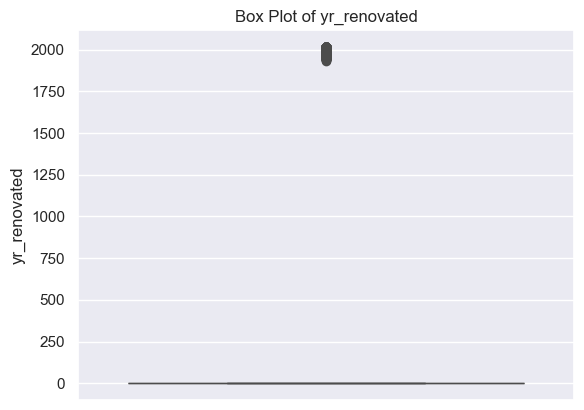


Upper Limit:  3021.0
Lower Limit:  0.0

[]

Shape pre-drops (21576, 16)


Shape post-drops (21576, 16)

New Box Plot



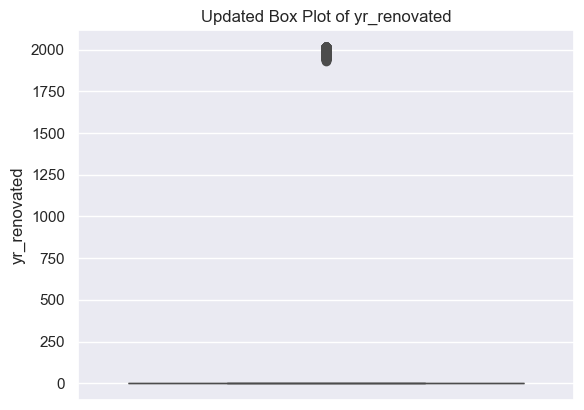


------------------------------------------------------------------------

Cleansing sqft_living15

Removing Outliers



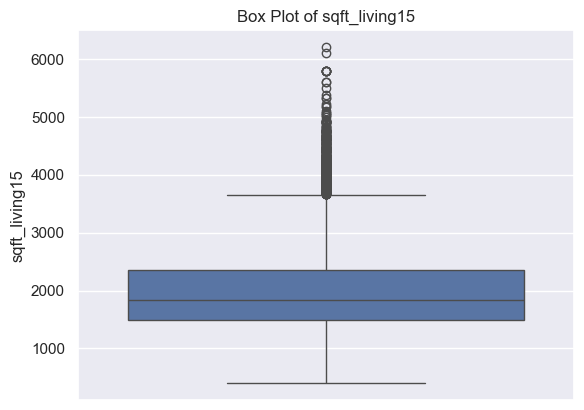


Upper Limit:  7519.125000000131
Lower Limit:  497.1666666666667

[17253 13411 12078]

Shape pre-drops (21576, 16)

Dropping index: 17253 with value 460 in column sqft_living15
Dropping index: 13411 with value 399 in column sqft_living15
Dropping index: 12078 with value 460 in column sqft_living15

Shape post-drops (21573, 16)

New Box Plot



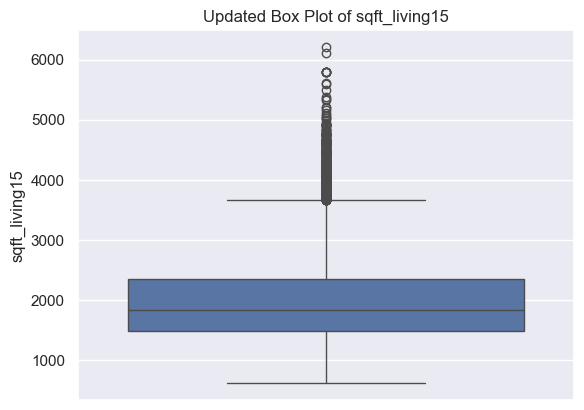


------------------------------------------------------------------------

Cleansing sqft_lot15

Removing Outliers



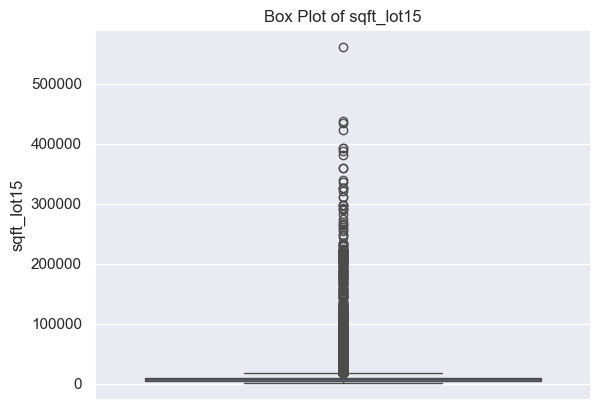


Upper Limit:  437913.01800000656
Lower Limit:  590.6666666666666

[13432  8641]

Shape pre-drops (21573, 16)

Dropping index: 13432 with value 560617 in column sqft_lot15
Dropping index: 8641 with value 438213 in column sqft_lot15

Shape post-drops (21571, 16)

New Box Plot



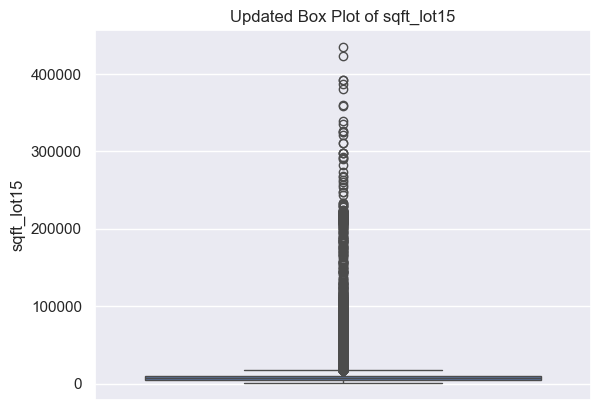


------------------------------------------------------------------------


In [34]:
data_cleanse(df)

### Log-Normal Distribution Function Definition

Here I define a funciton to convert selected columns to log-normal distribution.  These columns are identified manually through the original histograms, but I'm defining this as a function here because it's technically a data function.  I don't call it until later because I want to run the model against standard distribution first, then log-normal distribution second to compare.

In [37]:
#Funciton definiton for converting columns to log-normal distribution.
def log_normal(df, log_columns, print_flag):

  #Iterate through the columns and perform the manipulations.
  for column in log_columns:

    #Add 1 to all columns to offset div/0 errors.
    df[column] += 1
    
    #Print a header for what we're doing.
    if print_flag == True:
        print(column + " Log-Normal Distribution")
        print()

    #Plot the original distribution.
    if print_flag == True:
      fig, ax = plt.subplots()
      ax.ticklabel_format(axis="both", style="plain")
      df[column].hist()
      title=column + " pre Log-Normal Distribution"
      plt.title(title)
      plt.show()
      print()

    #Apply the log transformation.
    df[column] = np.log(df[column])
    df[column] = df[column].apply(lambda x: np.clip(x, 0, None))

    #Plot the new distribution.
    if print_flag == True:
      fig, ax = plt.subplots()
      ax.ticklabel_format(axis="both", style="plain")
      df[column].hist()
      title=column + " post Log-Normal Distribution"
      plt.title(title)
      plt.show()
      print()
      print("------------------------------------------------------------------------")

  #Return the data set with the new columns.
  return df

## Prepared Data

Here is the data after all the initial manipulations.  Again, I'm writing all of this code inside of a function so I can call it after subsequent manipulations.

In [40]:
#Show Data function definitoin
def show_data(df):
  #Plot the histograms
  print()
  print("Histograms Showing Data Distribution")
  plt.tight_layout()
  df.hist(figsize=(20,14))
  plt.show()
  print()

  #Plot the correlation matrix
  print("Correlation Matrix Showing Data Correlation")
  plt.figure(figsize=(15,8))
  sns.heatmap(df.corr(), annot=True, linewidths=1, fmt='.2f')
  plt.show()
  return



Now let's call that new function.


Histograms Showing Data Distribution


<Figure size 640x480 with 0 Axes>

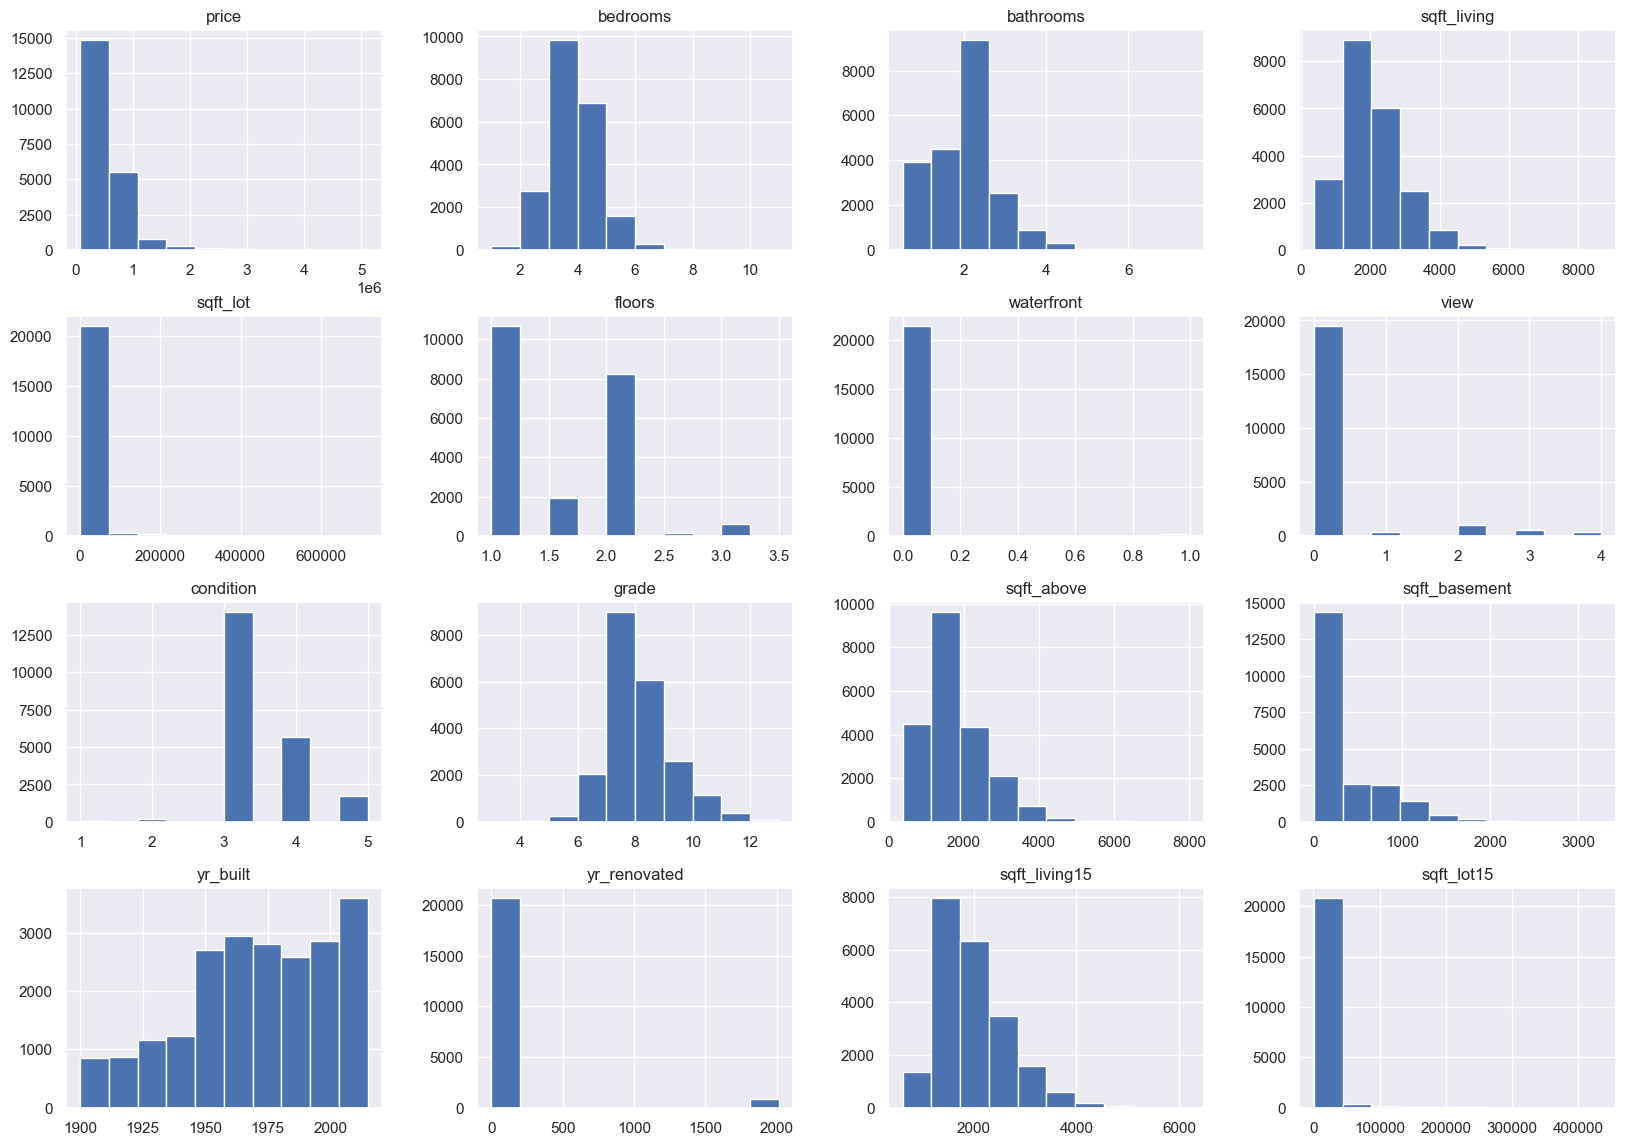


Correlation Matrix Showing Data Correlation


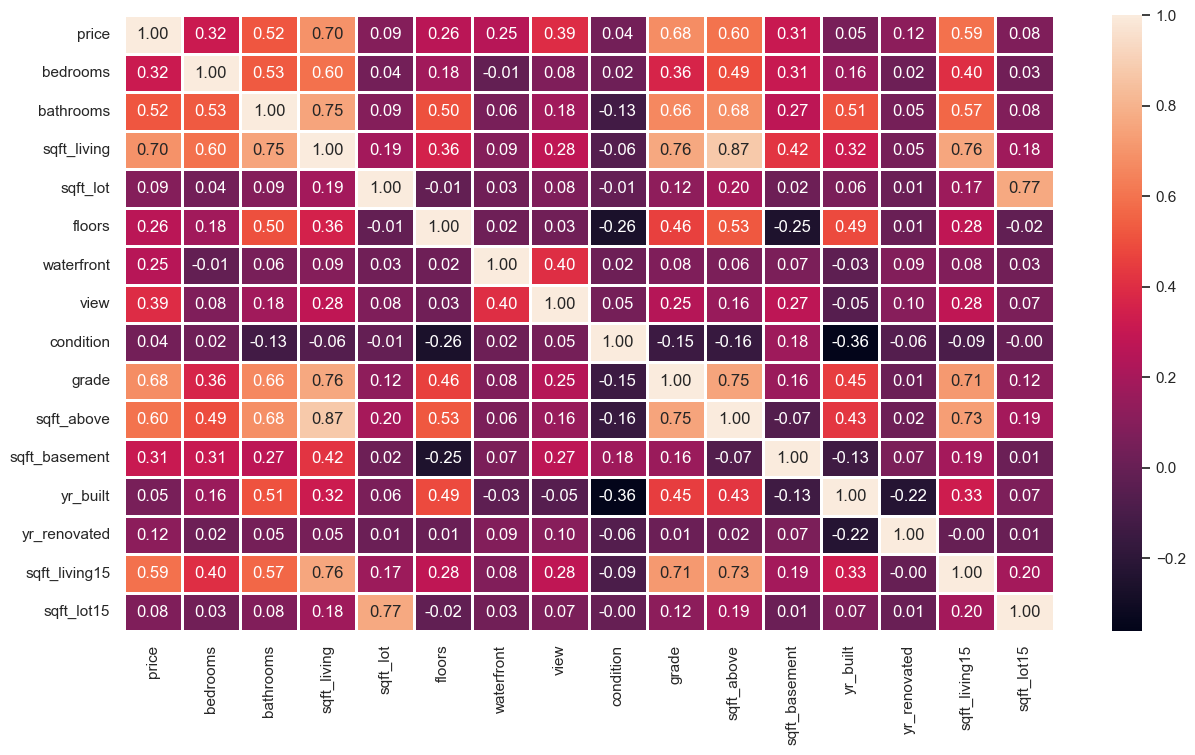

In [42]:
#Call the function against the whole data set.
show_data(df)

You'll notice the data is much more normalized since the initial histograms.  There is also a correlation matrix that gives insight into how data points affect each other, with the big one being price (which will end up being our output).

## Split Data Function Definition

This is the function definiton for splitting the data into training sets and testing sets, as well as splitting the output from the data points.  I take in only a data frame with all data, and return:
*   Training Data Set
*   Testing Data Set
*   Training Data Points
*   Training Output Values
*   Testing Data Points
*   Testing Output Values



In [46]:
#Function definition for splitting out data into subsets.
def split_data(df):
  #Drop outputs from data points
  x = df.drop(["price"], axis=1)
  #Extract the outputs from the full data set
  y = df["price"]

  #Split the training/test sets from each other.
  train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2)

  #Join the data points back with the outputs for each subset of data
  train_data = train_x.join(train_y)
  test_data = test_x.join(test_y)

  return train_data, test_data, train_x, test_x, train_y, test_y


## Training ML

Time to actually split the data with the above declared function.


Histograms Showing Data Distribution


<Figure size 640x480 with 0 Axes>

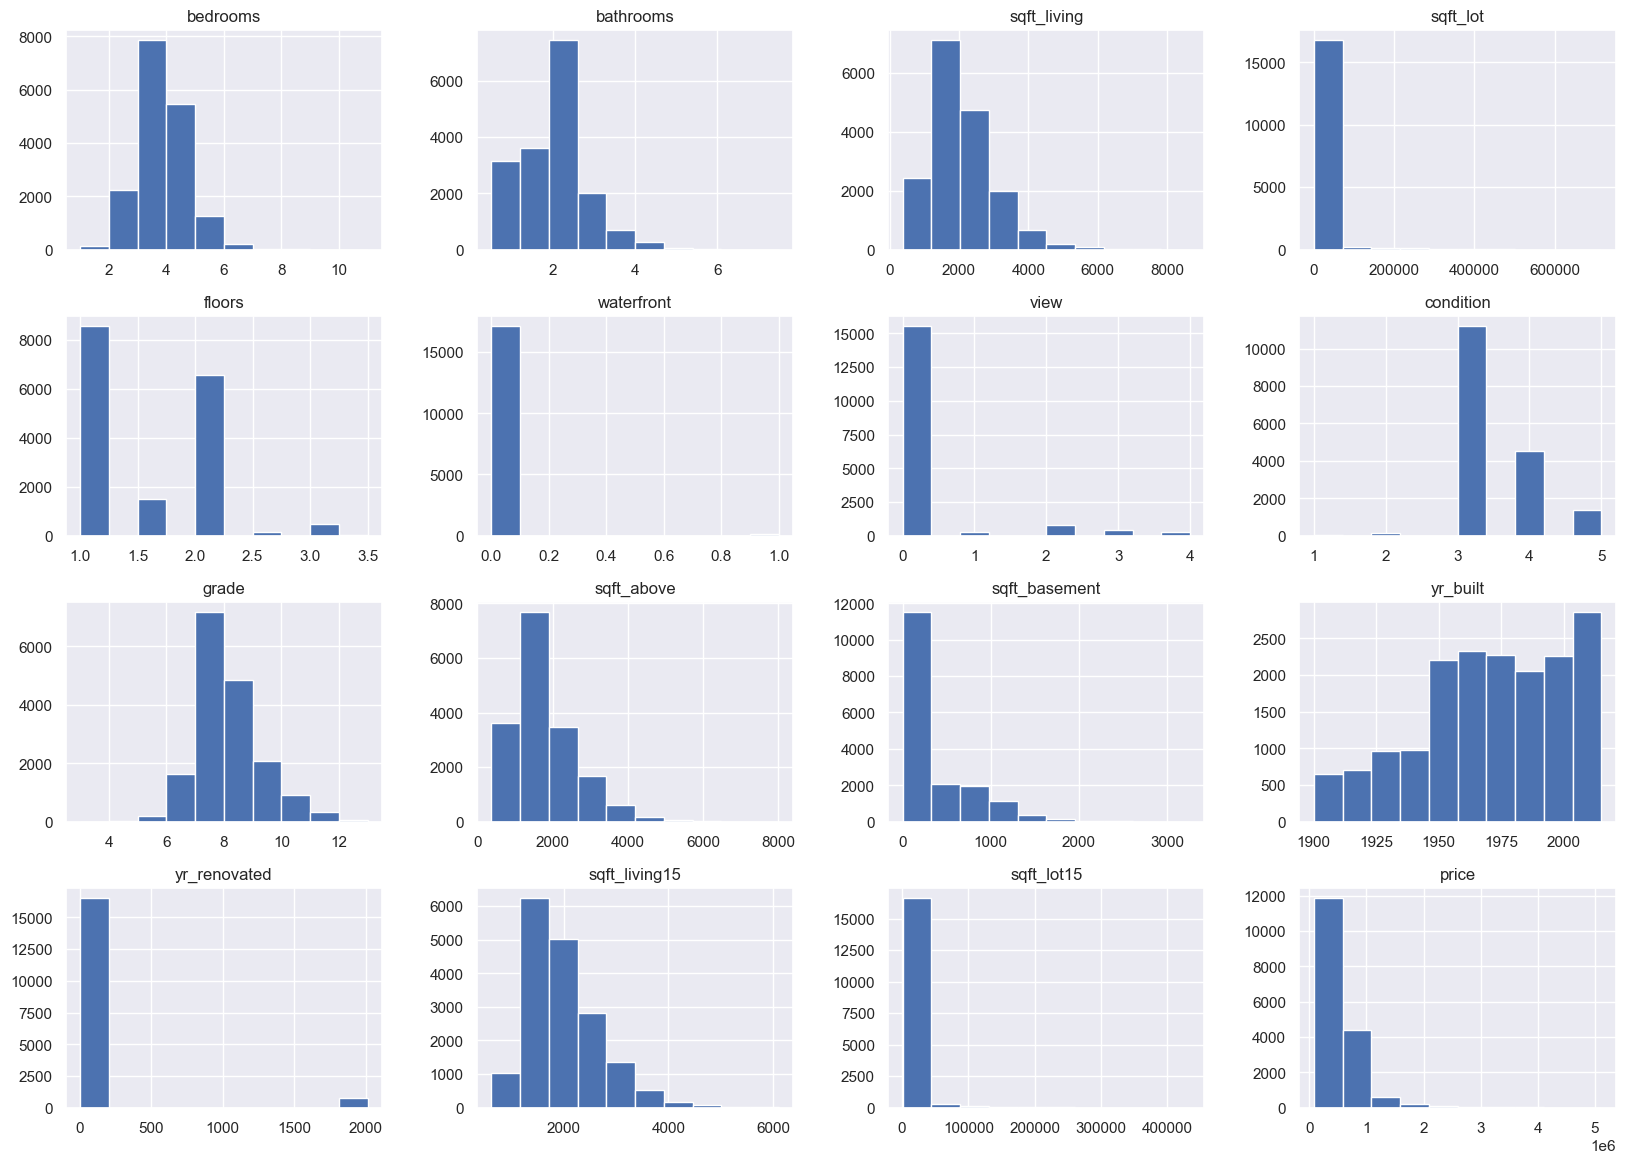


Correlation Matrix Showing Data Correlation


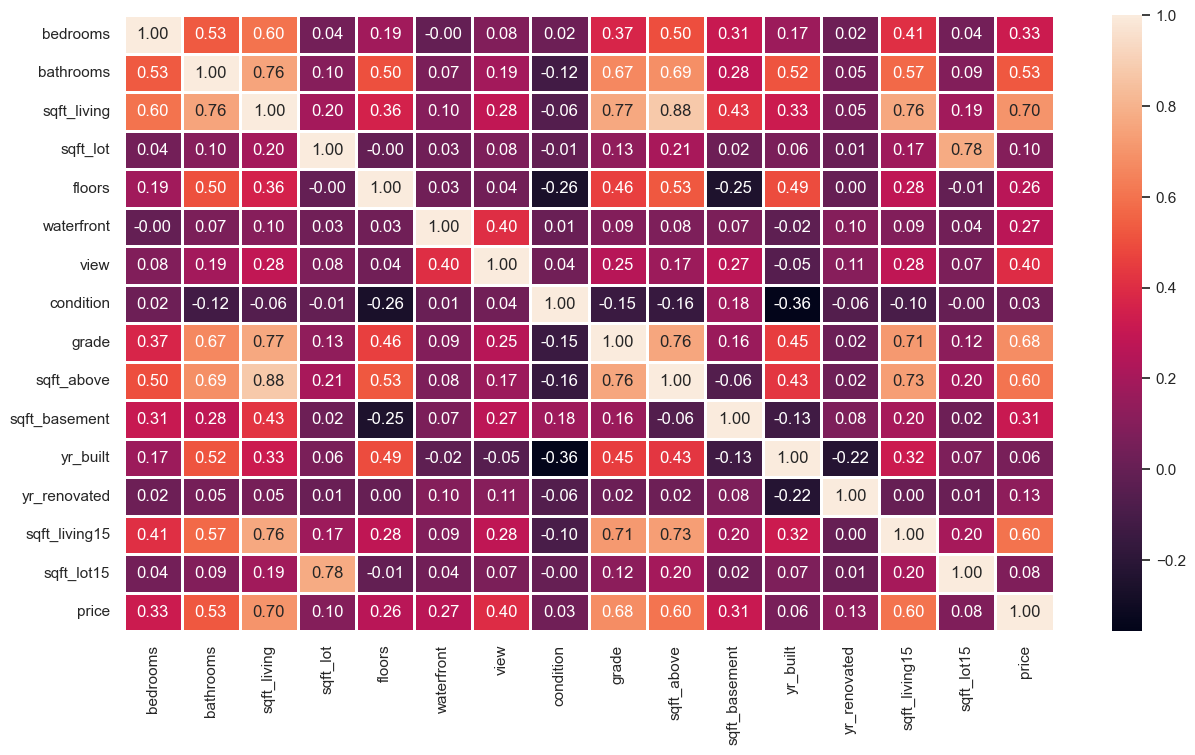

In [49]:
#Let's split out the data into the subsets for training.
train_data, test_data, train_x, test_x, train_y, test_y = split_data(df)

#Now let's look at some graphics to visualize the data.
show_data(train_data)

### Training a Model on the Standard Data Set

Let's get to training some models!  Here we start with a RandomForestRegressor on the standard data set.

In [52]:
#Declare the model
model = RandomForestRegressor(n_estimators=300, verbose=1)
#Fit the training data into the model and begin training.
model.fit(train_x, train_y)
print()

#Lets see the score against the test data.
model_score = model.score(test_x, test_y)
print(model_score)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   42.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



0.7261949469205162


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.2s finished


### Training a Model on the Log-Normalized Data Set

Let's get the Log-Normalized data created and split out.

price Log-Normal Distribution



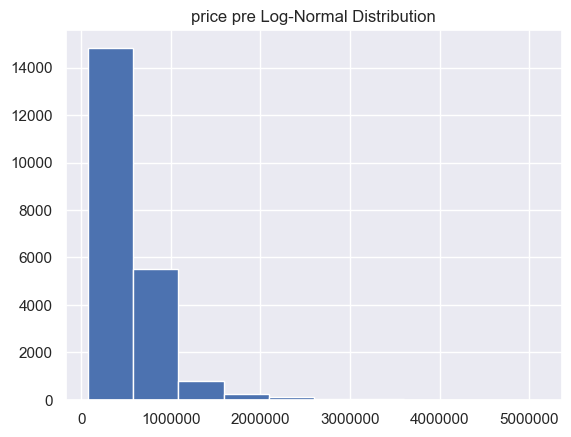

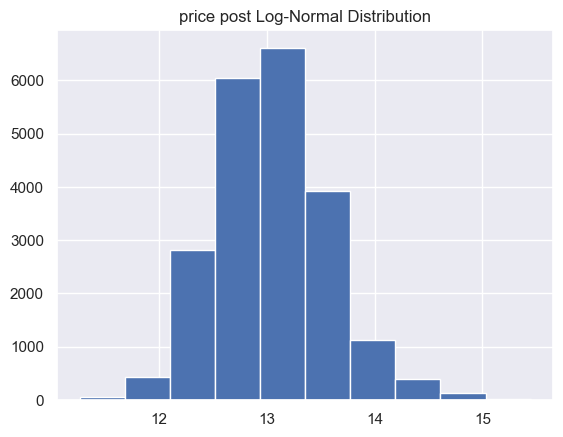


------------------------------------------------------------------------
bathrooms Log-Normal Distribution



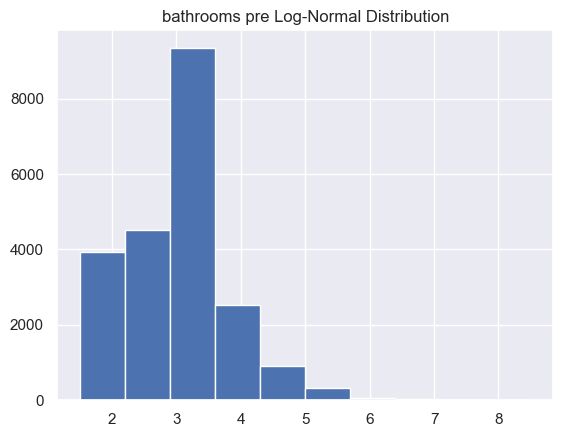

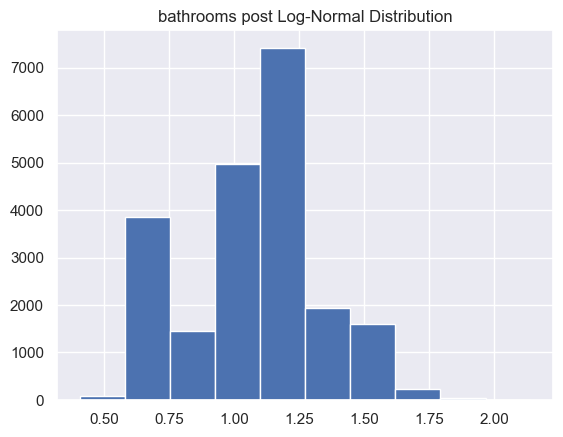


------------------------------------------------------------------------
sqft_living Log-Normal Distribution



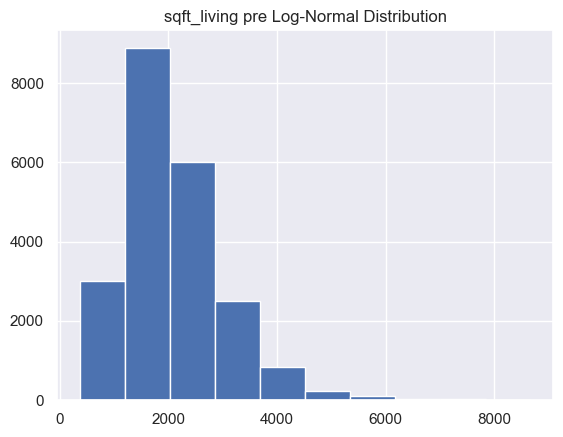

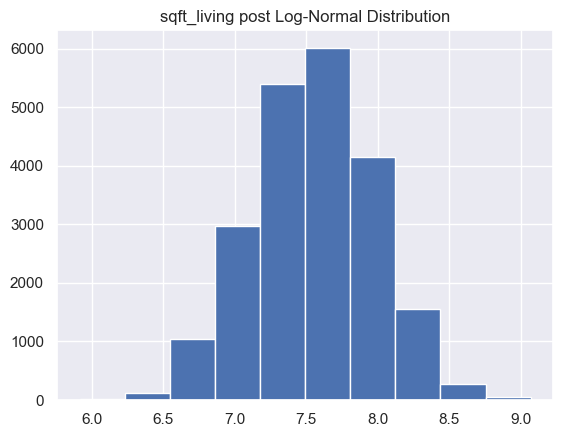


------------------------------------------------------------------------
sqft_lot Log-Normal Distribution



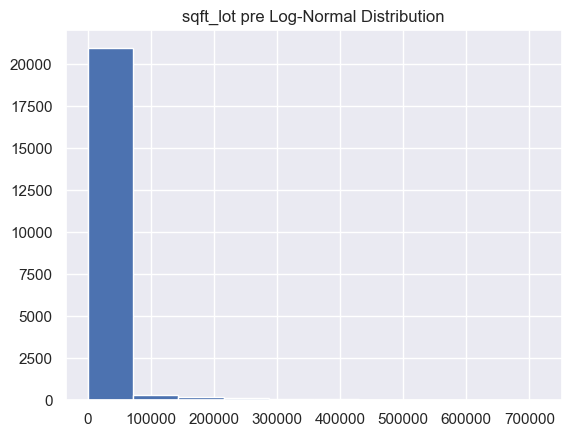

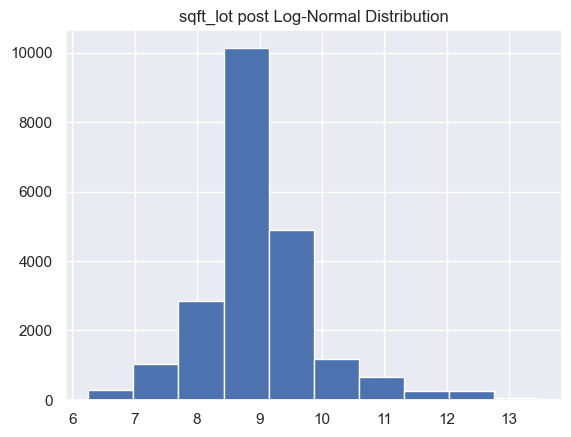


------------------------------------------------------------------------
sqft_above Log-Normal Distribution



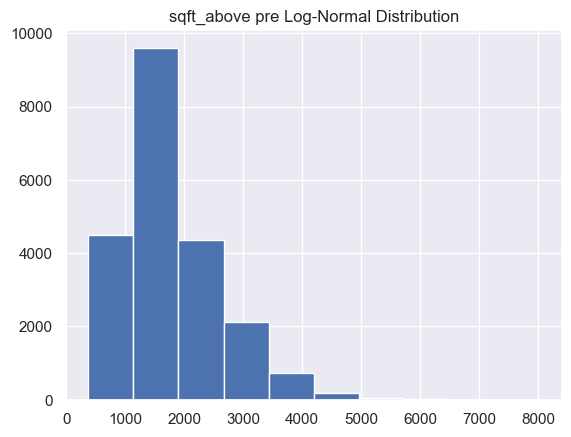

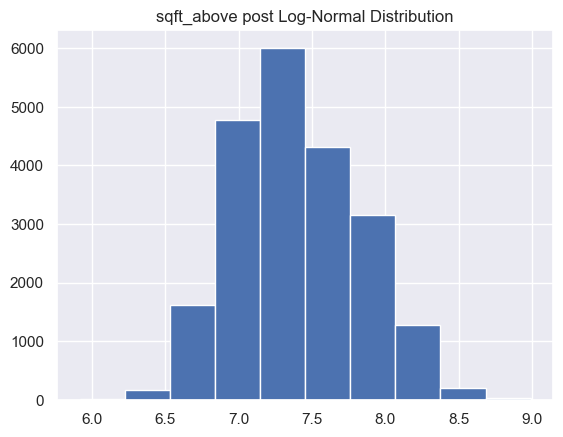


------------------------------------------------------------------------
sqft_basement Log-Normal Distribution



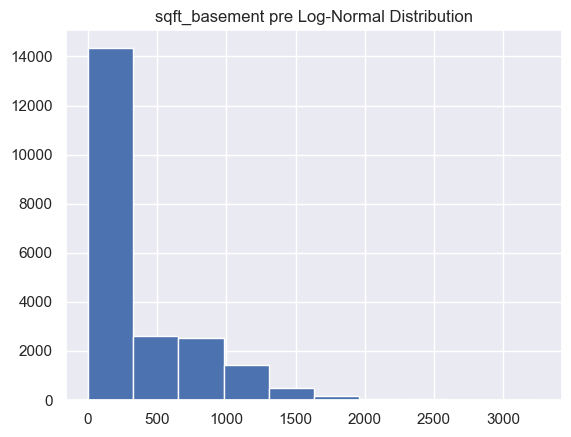

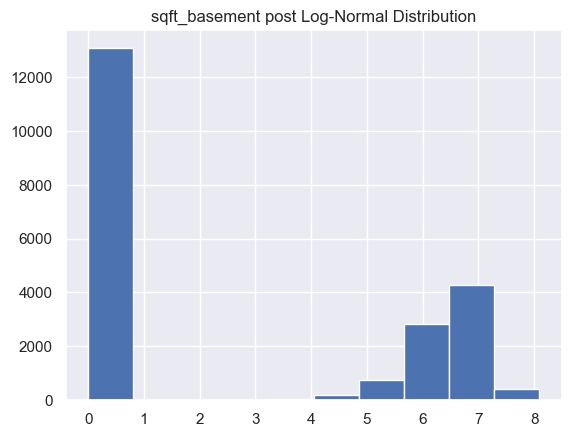


------------------------------------------------------------------------
sqft_living15 Log-Normal Distribution



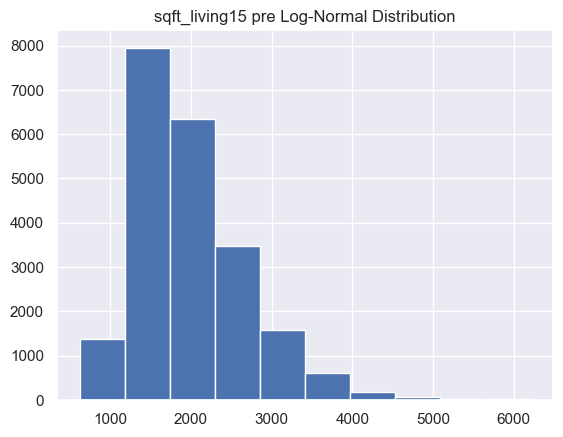

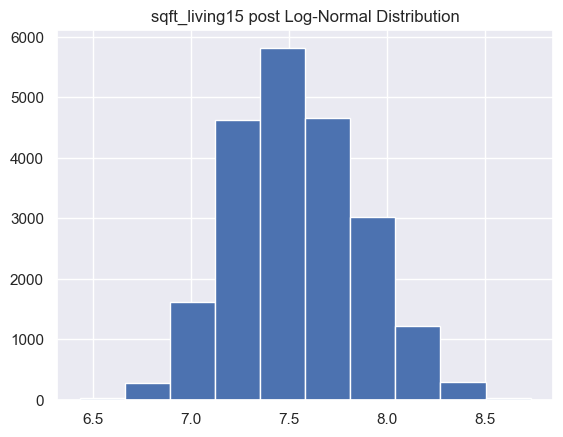


------------------------------------------------------------------------
sqft_lot15 Log-Normal Distribution



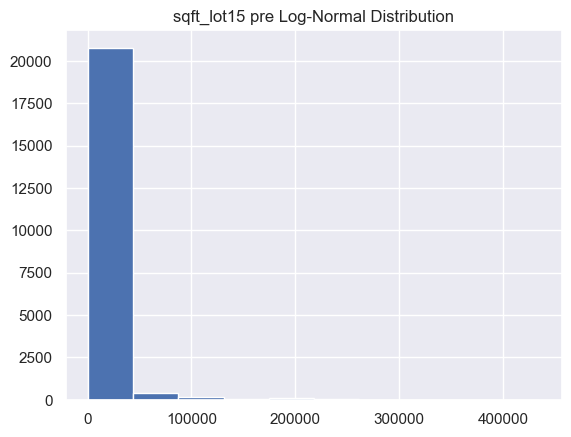

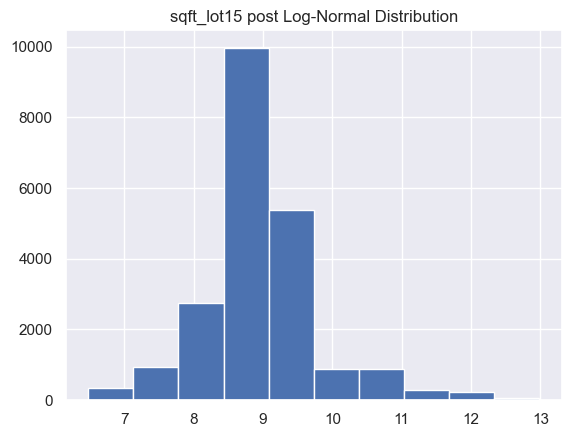


------------------------------------------------------------------------

Histograms Showing Data Distribution


<Figure size 640x480 with 0 Axes>

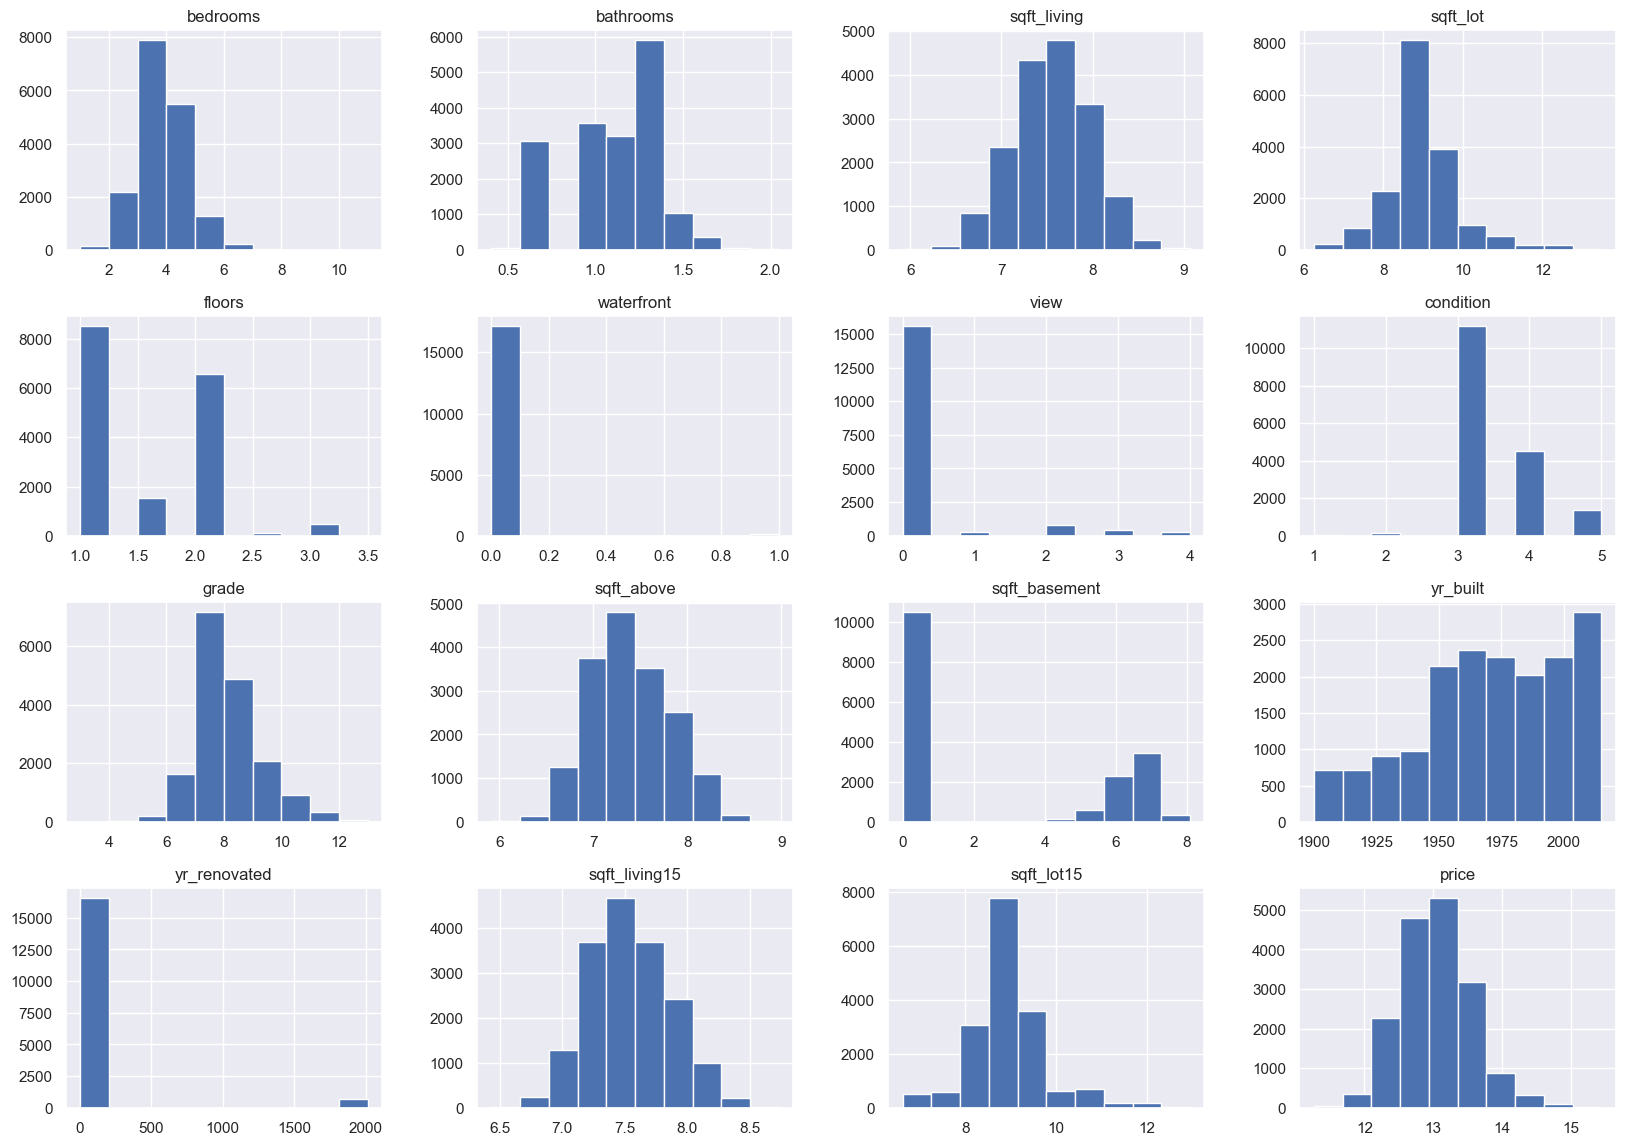


Correlation Matrix Showing Data Correlation


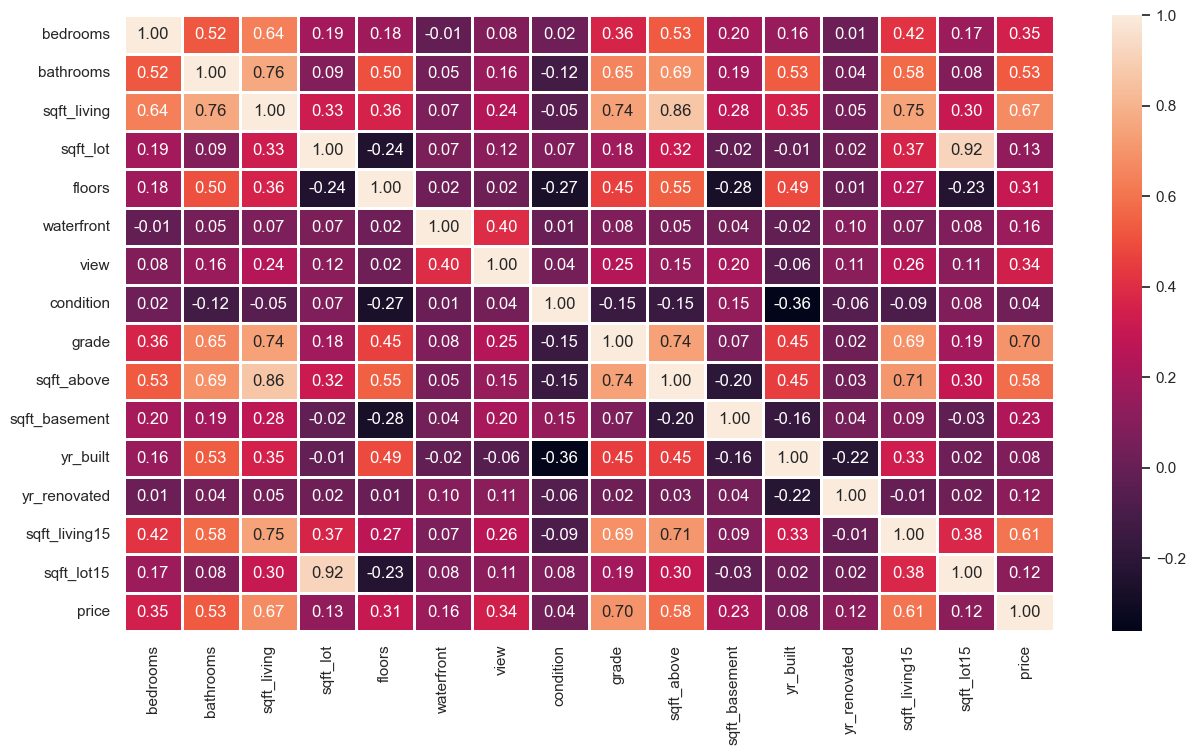

In [55]:
#Define which columns will be converted to log-normal distribution.
log_columns = ["price", "bathrooms", "sqft_living", "sqft_lot", "sqft_above", "sqft_basement", "sqft_living15", "sqft_lot15"]

#Determine if we want the output from the log-normal conversion and make the conversion.
print_flag = True
log_normal(df, log_columns, print_flag)

#Now we split the new Log-Normalized data out into training and test data
train_data, test_data, train_x, test_x, train_y, test_y = split_data(df)
show_data(train_data)

Looks good.  Now let's train up that model.

In [57]:
#Create and train the new model
log_model = RandomForestRegressor(n_estimators=300, verbose=1)
log_model.fit(train_x, train_y)
print()

#Let's see the score against the test data.
log_model_score = log_model.score(test_x, test_y)
print(log_model_score)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   41.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



0.7237561215859578


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished


## Prediction

Let's have an interface here to accept input for the prediction.  We'll then predict based on the two separate models and include the score in the printout.  I keep all this code in the same block so that as inputs are adjusted you can just re-run this block and get new predictions.

In [60]:
#Take input for prediction
predict_bedrooms = 2 # @param {type:"slider", min:1, max:8, step:1}
predict_bathrooms = 1 # @param {type:"slider", min:0.5, max:8, step:0.5}
predict_sqft_living = 1180 # @param {type:"integer", min:500, max:8000}
predict_sqft_lot = 5650 # @param {type:"integer", min:500, max:8000}
predict_floors = 1 # @param {type:"slider", min:1, max:5, step:0.5}
predict_waterfront = "0" # @param ["1", "0"]
#Convert the string from a dropdown to an int.
predict_waterfront = int(predict_waterfront)
predict_view = 0 # @param {type:"slider", min:0, max:4, step:1}
predict_condition = 3 # @param {type:"slider", min:1, max:5, step:1}
predict_grade = 7 # @param {type:"slider", min:1, max:13, step:1}
predict_sqft_above = 1180 # @param {type:"integer", min:500, max:8000}
predict_sqft_basement = 0 # @param {type:"integer", min:500, max:8000}
predict_yr_built = 1955 # @param {type:"integer", min:1900, max:2021}
predict_yr_renovated = 0 # @param {type:"integer", min:1900, max:2021}
predict_sqft_living15 = 1340 # @param {type:"integer", min:500, max:8000}
predict_sqft_lot15 = 5650 # @param {type:"integer", min:500, max:8000}

#Set price to 0, as that's what we're predicting.
predict_price = 0

#Make a list of columns that doesn't include price for use in the Log conversion.
predict_log_columns = log_columns
predict_log_columns.remove("price")

#Create a list with all the above data in the order of our dataframes
predict = [predict_price, predict_bedrooms, predict_bathrooms, predict_sqft_living, predict_sqft_lot, predict_floors, predict_waterfront, predict_view, predict_condition, predict_grade, predict_sqft_above, predict_sqft_basement, predict_yr_built, predict_yr_renovated, predict_sqft_living15, predict_sqft_lot15]
#Create a dataframe to house the data.  I'm using the columns from the training data, hence why I needed "price".
predict_df = pd.DataFrame(columns=df.columns)
#Insert the data from the list into the first row.
predict_df.loc[0] = predict
#Now let's get that pesky "price" back out of there so we can make a prediction!
predict_df.drop(columns="price", inplace=True)

#Make the prediction based on the standard model.
model_price = model.predict(predict_df)
model_price = round(model_price[0], 2)

#Convert the prediction data to log based on the same criteria for conversion as
log_normal(predict_df, predict_log_columns, False)
#Make the prediciton based on the Log-Normal model.
log_model_price = log_model.predict(predict_df)
#Invert the log function on the price
log_model_price = np.exp(log_model_price)
log_model_price = round(log_model_price[0], 2)

#Print the results
print("Predicted price from standard model:", model_price, "with", round(model_score*100, 2), "% accuracy.")
print("Predicted price from log-normal model:", log_model_price, " with ", round(log_model_score*100, 2), "% accuracy.")
print()

Predicted price from standard model: 274144.03 with 72.62 % accuracy.
Predicted price from log-normal model: 334901.55  with  72.38 % accuracy.



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
